### Exploration on election Data
Exploration points covered:
- Frequency of tweets/post _to compare the three sources and see how the discourse buildup in each_
- See proportion of emotions before and after
- See growth of emotions and positive/negative wordcounts
- See top tweeting/posting accounts/subreddit/fb page

## Facebook Data
### 1. Data Loading, Sanity Check (null id and values), and Overview

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

fb_before_df = pd.read_csv (r'../data/facebook_before_election.csv')
fb_after_df = pd.read_csv (r'../data/facebook_after_election.csv')

fb_before_df = fb_before_df[fb_before_df['id'].notnull()]
fb_after_df = fb_after_df[fb_after_df['id'].notnull()]

display(fb_before_df[:5])
print("=============================================================")
print("= In total, we have {} Facebook text data before election =".format(len(fb_before_df.index)))
print("=============================================================")

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1000503187718382020-10-27 17:00:27 EDT,2020-10-27T21:00:27.000Z,This is what a revolution looks like 🇺🇸👀 And i...,tagtrumpflag,0.346558,0.006724,0.008459,0.020266,0.015055,0.000000,...,0.000000,0.062500,0,0.000000,0.020833,0.000000,0.000000,0.041667,0.041667,joy
1,1000441505136922020-10-27 13:30:54 EDT,2020-10-27T17:30:54.000Z,G-D Bless the United States of America! Let’s ...,dr.estellasneider,0.874683,0.006531,0.006277,0.008195,0.006971,0.000000,...,0.000000,0.063492,0,0.000000,0.063492,0.031746,0.000000,0.095238,0.063492,joy
2,1000503187718382020-10-27 09:53:18 EDT,2020-10-27T13:53:18.000Z,A sign of hope for future generations! Go baby...,tagtrumpflag,0.467846,0.007628,0.012037,0.019362,0.015725,0.020000,...,0.000000,0.040000,0,0.000000,0.000000,0.000000,0.000000,0.100000,0.040000,joy
3,18108433392027852020-10-27 13:31:44 EDT,2020-10-27T17:31:44.000Z,Estella G-D Bless the United States of Ameri...,President Donald J. Trump Jewish Coalition,0.895018,0.006518,0.006203,0.008038,0.006493,0.000000,...,0.000000,0.062500,0,0.000000,0.062500,0.031250,0.000000,0.093750,0.062500,joy
4,9171389783715332020-10-27 18:44:59 EDT,2020-10-27T22:44:59.000Z,Reasons to NOT Vote Democrat in 2020 1. STOP S...,Virginia Women For Trump,0.025099,0.063220,0.009992,0.337595,0.031795,0.028807,...,0.004115,0.051440,0,0.032922,0.100823,0.006173,0.014403,0.049383,0.084362,disgust


= In total, we have 6249 Facebook text data before election =


In [18]:
display(fb_after_df[:5])
print("=============================================================")
print("= In total, we have {} Facebook text data after election =".format(len(fb_after_df.index)))
print("=============================================================")

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,18567005779239322020-11-03 12:12:30 EST,2020-11-03T17:12:30.000Z,This is great! Vote #Trump2020ToSaveAmerica M...,CoCO for TRUMP - Conservatives of Central Ohio,0.244188,0.007904,0.007816,0.028727,0.013125,0.040000,...,0.0,0.00000,0,0.040000,0.08,0.04000,0.00000,0.040000,0.080000,joy
1,4738675597330862020-11-03 12:12:16 EST,2020-11-03T17:12:16.000Z,This is great! Vote #Trump2020ToSaveAmerica M...,Ohio Conservative Republicans - People’s Grass...,0.244188,0.007904,0.007816,0.028727,0.013125,0.040000,...,0.0,0.00000,0,0.040000,0.08,0.04000,0.00000,0.040000,0.080000,joy
2,14333090367428302020-11-03 12:19:15 EST,2020-11-03T17:19:15.000Z,his is great! Vote #Trump2020ToSaveAmerica My...,Team Trump,0.244188,0.007904,0.007816,0.028727,0.013125,0.040000,...,0.0,0.00000,0,0.040000,0.08,0.04000,0.00000,0.040000,0.080000,joy
3,1451550589941532020-11-02 22:11:02 EST,2020-11-03T03:11:02.000Z,Proven facts for your thoughts....Fact! The DN...,"Community of Maple Valley, WA",0.011648,0.070403,0.009349,0.607927,0.015426,0.024390,...,0.0,0.02439,0,0.048780,0.00,0.02439,0.04878,0.170732,0.170732,disgust
4,3945219506784222020-11-03 18:35:20 EST,2020-11-03T23:35:20.000Z,Opinion | Trump ends where he began: With on...,Ohio's Progressive Army,0.006925,0.053325,0.018267,0.837699,0.008316,0.176471,...,0.0,0.00000,0,0.117647,0.00,0.00000,0.00000,0.176471,0.058824,disgust


= In total, we have 48234 Facebook text data after election =


### 2. Statistical analysis overview and boxplot for numerical value

In [5]:
print("Facebook data before election:")
fb_before_df.describe()

Facebook data before election:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,...,6249.000000,6249.000000,6249.000000,6249.0,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000
mean,0.049032,0.083867,0.014731,0.307487,0.060523,0.026633,0.048031,0.008850,0.035957,0.030564,...,0.000837,0.001279,0.057933,0.0,0.023492,0.045883,0.013658,0.016423,0.083514,0.066521
std,0.120800,0.166637,0.037430,0.296753,0.141632,0.029246,0.039749,0.016379,0.033273,0.031645,...,0.004929,0.005897,0.043184,0.0,0.027189,0.038224,0.019930,0.023273,0.049312,0.045115
min,0.004041,0.003424,0.003162,0.004341,0.004383,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001757,0.002618
25%,0.008805,0.007980,0.009062,0.046316,0.012139,0.000000,0.019048,0.000000,0.014925,0.000000,...,0.000000,0.000000,0.026316,0.0,0.000000,0.016393,0.000000,0.000000,0.047619,0.032967
50%,0.020138,0.017087,0.011780,0.141434,0.020933,0.022222,0.040426,0.000000,0.030303,0.024390,...,0.000000,0.000000,0.051282,0.0,0.018868,0.043478,0.000000,0.007937,0.076923,0.055556
75%,0.037673,0.063781,0.014845,0.637269,0.038485,0.040816,0.066667,0.011696,0.050000,0.045455,...,0.000000,0.000000,0.080214,0.0,0.037500,0.068182,0.022727,0.025052,0.114058,0.088235
max,0.915246,0.894633,0.951796,0.844649,0.950268,0.204082,0.400000,0.137931,0.428571,0.428571,...,0.097561,0.086957,0.285714,0.0,0.285714,0.333333,0.250000,0.200000,0.408163,0.571429


In [6]:
print("Facebook data after election:")
fb_after_df.describe()

Facebook data after election:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,...,48234.000000,48234.000000,48234.000000,48234.0,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000,48234.000000
mean,0.047301,0.094989,0.015734,0.301568,0.045818,0.029583,0.053538,0.009666,0.040337,0.032537,...,0.000576,0.001224,0.062781,0.0,0.024175,0.043152,0.017593,0.010363,0.092787,0.072873
std,0.119072,0.189014,0.048208,0.279725,0.108878,0.029728,0.044103,0.018469,0.037287,0.035484,...,0.004235,0.006489,0.050781,0.0,0.028553,0.039911,0.023363,0.018651,0.052097,0.048857
min,0.003983,0.003392,0.003003,0.004497,0.003970,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001350,0.001623
25%,0.008687,0.008557,0.008978,0.057081,0.010991,0.000000,0.023810,0.000000,0.015419,0.000000,...,0.000000,0.000000,0.027778,0.0,0.000000,0.000000,0.000000,0.000000,0.055556,0.037037
50%,0.020000,0.020405,0.011443,0.172287,0.020594,0.025641,0.045977,0.000000,0.034483,0.025641,...,0.000000,0.000000,0.055351,0.0,0.019048,0.036364,0.009259,0.000000,0.083333,0.062500
75%,0.033627,0.066850,0.014487,0.562773,0.035400,0.045455,0.074074,0.014085,0.055556,0.048387,...,0.000000,0.000000,0.085714,0.0,0.039216,0.066372,0.028571,0.015873,0.121212,0.096154
max,0.919093,0.897840,0.954499,0.850793,0.949574,0.400000,0.500000,0.400000,0.500000,0.391304,...,0.142857,0.200000,0.622642,0.0,0.333333,0.350000,0.250000,0.264706,0.666667,0.500000


Text(0.5, 1.0, 'Facebook data after election (numerical features)')

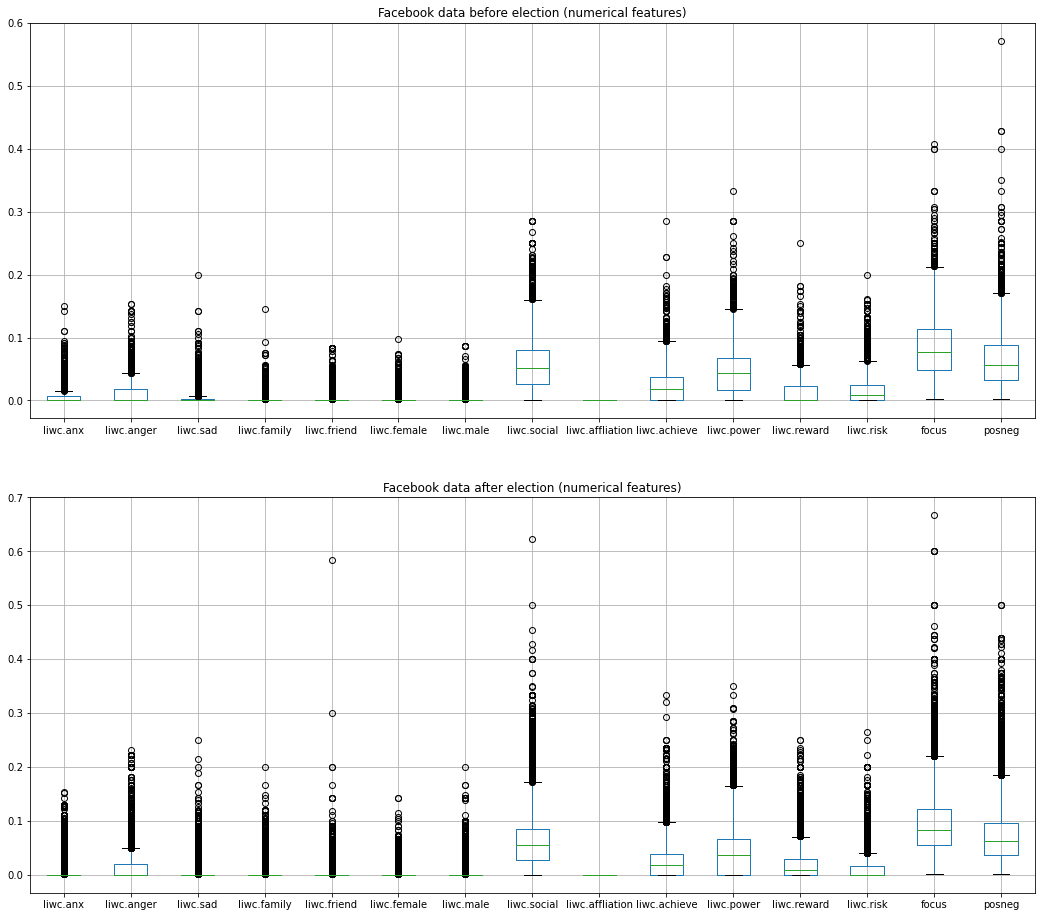

In [7]:
f, ax = plt.subplots(2, figsize=(18, 16))
plt.subplot(2,1,1)
boxplot = fb_before_df.boxplot(column=fb_before_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot.set_title("Facebook data before election (numerical features)")

plt.subplot(2,1,2)
boxplot2 = fb_after_df.boxplot(column=fb_after_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot2.set_title("Facebook data after election (numerical features)")

### 3. Frequency of post over time

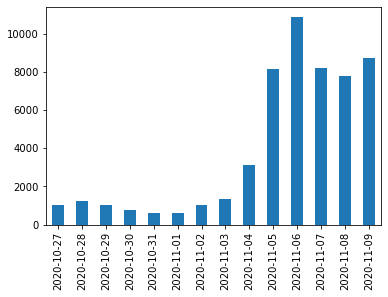

In [8]:
#add new date column
fb_before_df['date_column'] = pd.to_datetime(fb_before_df['created_at']).dt.date
fb_after_df['date_column'] = pd.to_datetime(fb_after_df['created_at']).dt.date

#check posting frequency
date_agg_before = fb_before_df['date_column'].value_counts(sort = False)
date_agg_after = fb_after_df['date_column'].value_counts(sort = False)

fb_date_agg_all = date_agg_before.add(date_agg_after,fill_value=0)

fb_date_plot = fb_date_agg_all.plot(kind='bar')

We can see that the posts in Facebook skyrocketed after election

### 4. Emotion (category data) share

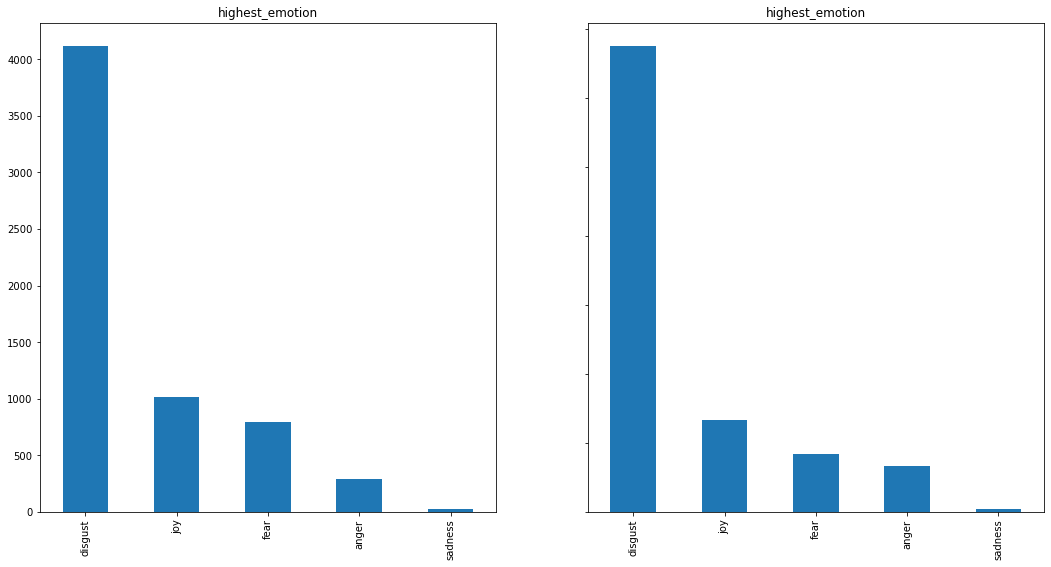

In [42]:
#check most common emotion before the election

f, ax = plt.subplots(1,2, figsize=(18, 9))

plt.subplot(1,2,1)
before_emotion_count = fb_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot = before_emotion_count.plot(kind='bar', subplots = True, sharey = True)

plt.subplot(1,2,2)
after_emotion_count = fb_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot = after_emotion_count.plot(kind='bar', subplots = True, sharey = True)



Both before and after the election, disgust is the most common emotion shown in these posts.

### 5. Emotion values over time

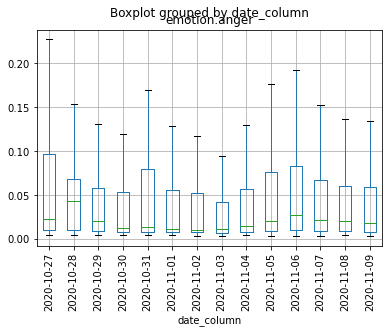

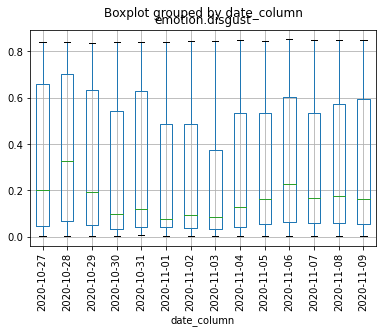

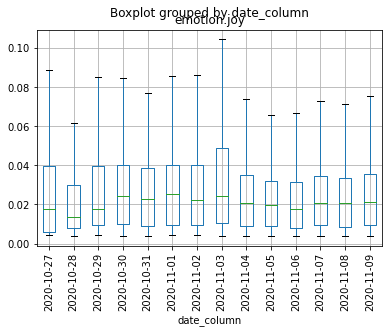

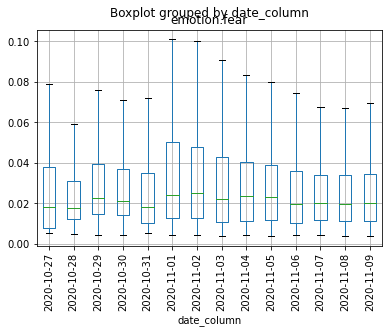

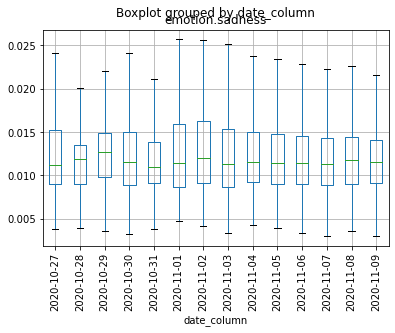

In [12]:
#check growth of each emotions per date

df_all_fb = [fb_after_df,fb_before_df]
df_all_fb = pd.concat(df_all_fb)

boxplot_anger = df_all_fb.boxplot(column='emotion.anger', by='date_column', showfliers=False, rot=90, layout = (1,1))
boxplot_disgust = df_all_fb.boxplot(column='emotion.disgust', by='date_column', showfliers=False, rot=90, layout = (1,1))
boxplot_joy = df_all_fb.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_fear = df_all_fb.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_sadness = df_all_fb.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

From the box plot we can see that emotion values fluctuate before and after the election. Anger and disgust in posts show a slight increase after the election, the joy and fear emotion goes down a little bit, while there's no discernible patterns for sadness.


### 6. Most frequent posting accounts

In [13]:
#most common tweeting account
df_all_fb['author_id'].value_counts().head()

United Conservatives For America    125
The Ingraham Angle                  100
Zero Hedge Community                 71
Team Trump                           71
Virginia Women For Trump             69
Name: author_id, dtype: int64

### 7. Occurrence of negative and positive sayings

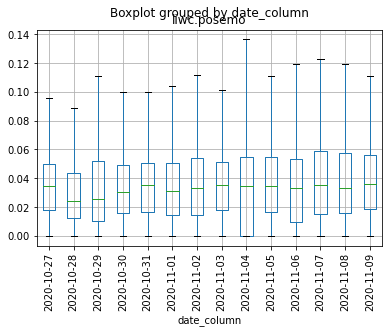

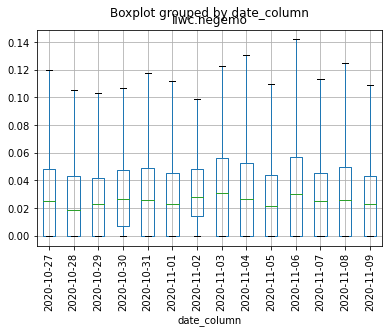

In [14]:
#occurrence of positive words
boxplot_positive = df_all_fb.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_negative = df_all_fb.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

We can see that appearance of negative emotion words increased after the election while no discernible pattern for appearance of positive emotion words

## Reddit Data
### 1. Data Loading, Sanity Check (null id and values), and Overview

In [19]:
#check posting frequency (reddit)

rd_before_df = pd.read_csv (r'../data/reddit_before_election.csv')
rd_after_df = pd.read_csv (r'../data/reddit_after_election.csv')

rd_before_df = rd_before_df[rd_before_df['id'].notnull()]
rd_after_df = rd_after_df[rd_after_df['id'].notnull()]

display(rd_before_df[:5])
print("=============================================================")
print("= In total, we have {} Reddit text data before election =".format(len(rd_before_df.index)))
print("=============================================================")

display(rd_after_df[:5])
print("=============================================================")
print("= In total, we have {} Reddit text data after election =".format(len(rd_after_df.index)))
print("=============================================================")


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,jjd54t/r/NelkFilmz/comments/jjd54t/7sipe_cunt_...,2020-10-27T23:59:37.000Z,7sipe cunt Whatever makes you sleep at night. ...,7sipesmother,0.005154,0.713061,0.005230,0.243122,0.007240,0.040816,...,0.000000,0.081633,0,0.000000,0.000000,0.000000,0.000000,0.204082,0.163265,anger
1,jjc95y/r/HazbinFanFics/comments/jjc95y/the_int...,2020-10-27T23:08:36.000Z,The international discovery:chapter 1The inter...,gamerman42069,0.042014,0.006661,0.014469,0.041740,0.032175,0.076115,...,0.007874,0.073491,0,0.028871,0.049869,0.018373,0.002625,0.112861,0.055118,joy
2,jjc4k9/r/legaladvice/comments/jjc4k9/timesensi...,2020-10-27T23:01:38.000Z,Time-sensitive - Today I found out my absentee...,mangobanananuts,0.026322,0.006136,0.015040,0.040300,0.054081,0.114286,...,0.000000,0.128571,0,0.000000,0.057143,0.028571,0.000000,0.157143,0.028571,fear
3,jjb81q/r/Reno/comments/jjb81q/voter_registrati...,2020-10-27T22:13:04.000Z,Voter registration cancellationVoter registrat...,township_rebel,0.030988,0.009188,0.016390,0.068443,0.029278,0.024390,...,0.000000,0.109756,0,0.012195,0.012195,0.012195,0.012195,0.109756,0.073171,disgust
4,jja37m/r/JAAGNet/comments/jja37m/twitter_adds_...,2020-10-27T21:13:32.000Z,Twitter Adds 'Pre-Bunk' Alerts To Preempt Fals...,kjonesatjaagnet,0.030077,0.010458,0.009896,0.066562,0.044340,0.023810,...,0.000000,0.076190,0,0.047619,0.057143,0.023810,0.033333,0.080952,0.028571,disgust


= In total, we have 4683 Reddit text data before election =


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,jnlnr7/r/technology/comments/jnlnr7/youtube_ch...,2020-11-03T23:36:19.000Z,YouTube channels made money off fake election ...,katwhispersASMR,0.007288,0.126207,0.012659,0.781643,0.006271,0.133333,...,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.133333,0.133333,disgust
1,jnla8e/r/MarkMyWords/comments/jnla8e/mmw_early...,2020-11-03T23:15:04.000Z,MMW: Early poll result will favour trump he ...,Benjenzo,0.027845,0.010646,0.011487,0.095535,0.029424,0.000000,...,0.0,0.160000,0,0.080000,0.000000,0.000000,0.080000,0.080000,0.240000,disgust
2,jnjqwi/r/u_unwantedopinion94/comments/jnjqwi/m...,2020-11-03T21:53:02.000Z,My voice was Stolen Election Fraud!!!!My voi...,unwantedopinion94,0.039165,0.006807,0.012089,0.033659,0.031351,0.134328,...,0.0,0.074627,0,0.014925,0.029851,0.029851,0.000000,0.223881,0.014925,joy
3,jniypn/r/JoeBiden/comments/jniypn/3_in_me2/,2020-11-03T21:12:24.000Z,+3 in ME2+3 in ME2 Actually pretty much my w...,FaithMichele,0.060385,0.004859,0.011268,0.034162,0.013770,0.109091,...,0.0,0.054545,0,0.090909,0.018182,0.072727,0.000000,0.181818,0.072727,joy
4,jnhsgr/r/Libertarian/comments/jnhsgr/what_now/,2020-11-03T20:10:05.000Z,What now?!?What now?!? This sub Reddit won’t l...,Juadi127,0.014097,0.024106,0.016733,0.551860,0.017386,0.042553,...,0.0,0.085106,0,0.000000,0.021277,0.000000,0.021277,0.212766,0.085106,disgust


= In total, we have 21346 Reddit text data after election =


### 2. Statistical analysis overview and boxplot for numerical value

In [20]:
print("Reddit data before election:")
rd_before_df.describe()

Reddit data before election:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,...,4683.000000,4683.000000,4683.000000,4683.0,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000
mean,0.019702,0.150465,0.014459,0.402003,0.041579,0.033165,0.086093,0.013430,0.055016,0.054210,...,0.000759,0.002431,0.069377,0.0,0.034844,0.053259,0.026708,0.020750,0.132689,0.109226
std,0.046888,0.239318,0.033051,0.294525,0.116665,0.037759,0.059964,0.025659,0.047368,0.049411,...,0.005556,0.010525,0.056525,0.0,0.039072,0.049244,0.034024,0.029675,0.068389,0.061685
min,0.003954,0.003754,0.003916,0.004520,0.004694,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008696,0.006579
25%,0.005683,0.011884,0.009356,0.104133,0.008119,0.000000,0.046065,0.000000,0.022222,0.020000,...,0.000000,0.000000,0.029091,0.0,0.000000,0.000000,0.000000,0.000000,0.084105,0.064516
50%,0.010918,0.042155,0.011996,0.382008,0.016140,0.025000,0.078652,0.000000,0.049180,0.046875,...,0.000000,0.000000,0.064516,0.0,0.026906,0.045603,0.016667,0.005780,0.120879,0.100000
75%,0.022059,0.137462,0.015132,0.707051,0.031185,0.052632,0.113636,0.018349,0.076923,0.074468,...,0.000000,0.000000,0.100000,0.0,0.052632,0.079455,0.043478,0.033333,0.166667,0.140625
max,0.874700,0.896653,0.949143,0.849781,0.950234,0.285714,0.454545,0.250000,0.363636,0.375000,...,0.100000,0.142857,0.600000,0.0,0.333333,0.333333,0.285714,0.250000,0.600000,0.444444


In [21]:
print("Reddit data after election:")
rd_after_df.describe()

Reddit data after election:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,...,21346.000000,21346.000000,21346.000000,21346.0,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000
mean,0.022520,0.148955,0.015535,0.418591,0.031360,0.039617,0.084652,0.013509,0.052880,0.053498,...,0.000655,0.003411,0.069447,0.0,0.030422,0.042296,0.023643,0.014951,0.137778,0.106377
std,0.066416,0.232056,0.045214,0.289928,0.086058,0.042511,0.060960,0.026456,0.048591,0.051435,...,0.005223,0.013611,0.057575,0.0,0.039416,0.043531,0.033838,0.027050,0.068584,0.062403
min,0.003887,0.003693,0.003480,0.004530,0.003196,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001422,0.001422
25%,0.005763,0.013940,0.009049,0.120627,0.007698,0.000000,0.043478,0.000000,0.015717,0.014286,...,0.000000,0.000000,0.027778,0.0,0.000000,0.000000,0.000000,0.000000,0.088235,0.061538
50%,0.010830,0.044624,0.011590,0.411029,0.014849,0.032787,0.076923,0.000000,0.045455,0.043478,...,0.000000,0.000000,0.062500,0.0,0.019231,0.035714,0.008264,0.000000,0.125000,0.093458
75%,0.021279,0.143489,0.014695,0.715790,0.028106,0.060606,0.116667,0.017857,0.076923,0.076923,...,0.000000,0.000000,0.100000,0.0,0.047619,0.066631,0.038462,0.022472,0.175258,0.137255
max,0.917621,0.897942,0.953055,0.854022,0.950486,0.500000,0.500000,0.285714,0.500000,0.500000,...,0.153846,0.333333,0.500000,0.0,0.500000,0.421053,0.500000,0.333333,0.666667,0.571429


Text(0.5, 1.0, 'Reddit data after election (numerical features)')

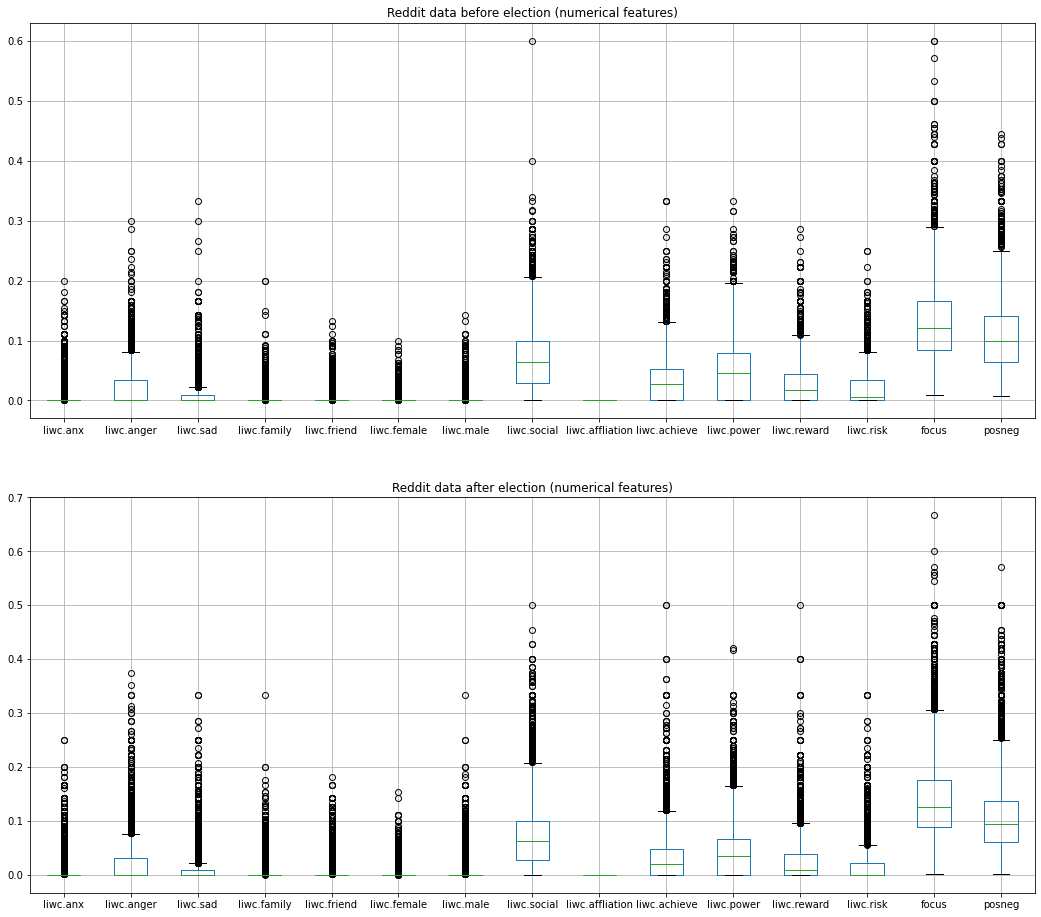

In [22]:
f, ax = plt.subplots(2, figsize=(18, 16))
plt.subplot(2,1,1)
boxplot = rd_before_df.boxplot(column=rd_before_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot.set_title("Reddit data before election (numerical features)")

plt.subplot(2,1,2)
boxplot2 = rd_after_df.boxplot(column=rd_after_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot2.set_title("Reddit data after election (numerical features)")

### 3. Frequency of post over time

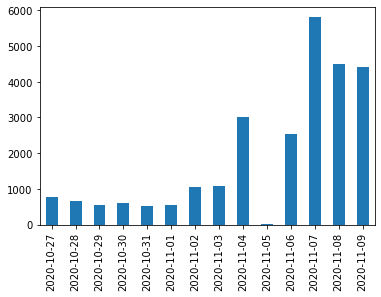

In [23]:
df_all_rd = [rd_before_df,rd_after_df]
df_all_rd = pd.concat(df_all_rd)
df_all_rd['date_column'] = pd.to_datetime(df_all_rd['created_at']).dt.date
rd_freq = df_all_rd['date_column'].value_counts(sort = False)
date_plot = rd_freq.plot(kind='bar')

We can see that the posts in Reddit after the election keep going high (January 7th).

### 4. Emotion (category data) share

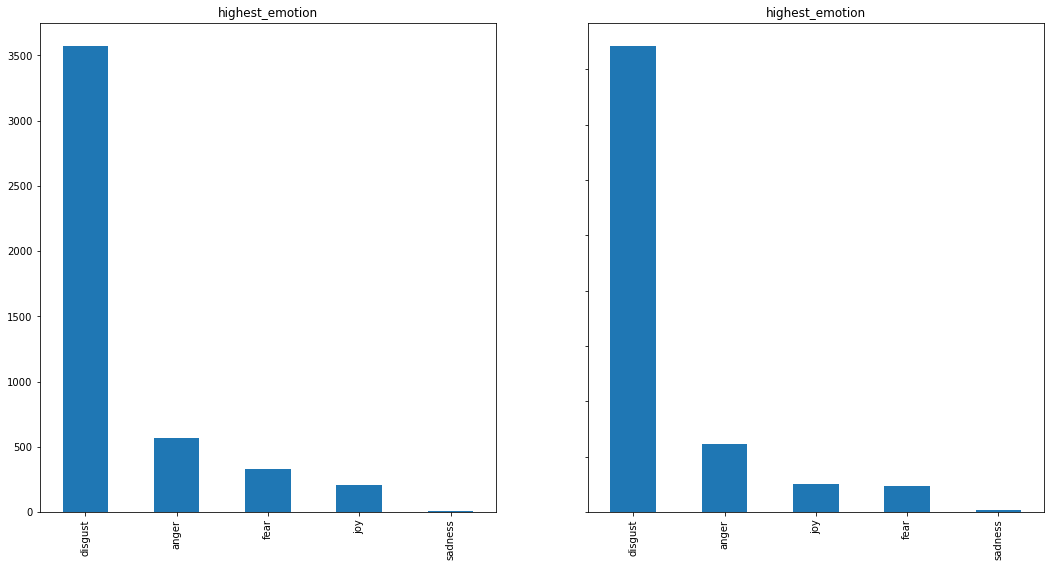

In [24]:
f, ax = plt.subplots(1,2, figsize=(18, 9))

plt.subplot(1,2,1)
before_emotion_count = rd_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot = before_emotion_count.plot(kind='bar', subplots = True, sharey = True)

plt.subplot(1,2,2)
after_emotion_count = rd_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot = after_emotion_count.plot(kind='bar', subplots = True, sharey = True)


Both before and after the election, disgust is the most common emotion shown in these posts. We can see also more post showing anger after the election in Reddit

### 5. Emotion values over time

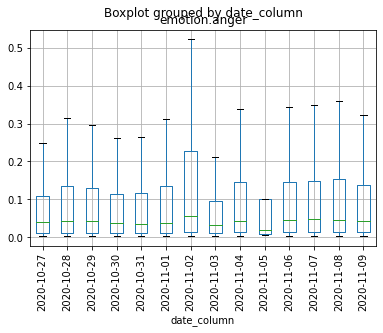

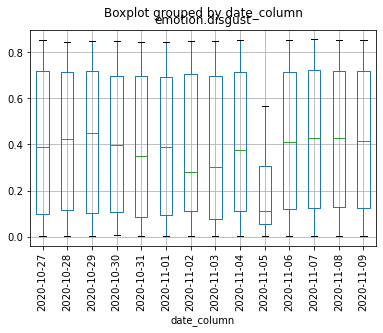

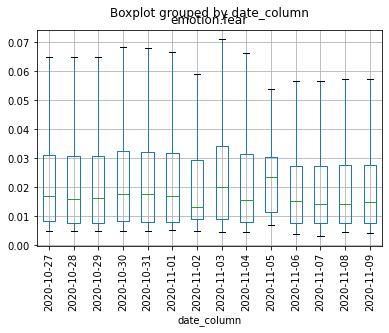

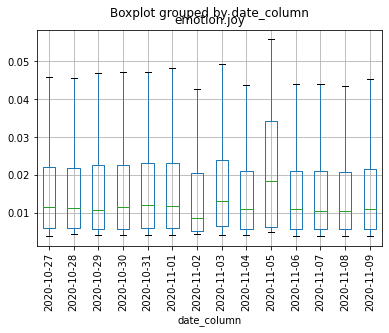

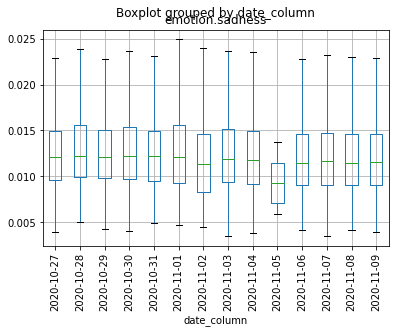

In [25]:
#check growth of each emotions per date (reddit)

boxplot_anger = df_all_rd.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_disgust = df_all_rd.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_fear = df_all_rd.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_joy = df_all_rd.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_sadness = df_all_rd.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

From the box plot we can see that emotion values fluctuate before and after the election. Disgust in posts show a slight increase after the election, there's a little bit decrease of both fear, joy and sadness after the election 


### 6. Most common posting accounts

In [26]:
#most common subreddit
df_all_rd['subreddit']=df_all_rd['id'].str.split('/').str[2]
df_all_rd['subreddit'].value_counts().head()

politics        5171
conspiracy      2276
Conservative    1494
trump            975
news             596
Name: subreddit, dtype: int64

### 7. Occurrence of negative and positive sayings

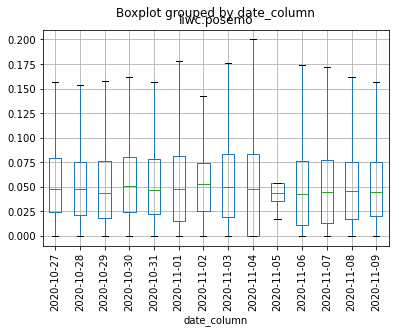

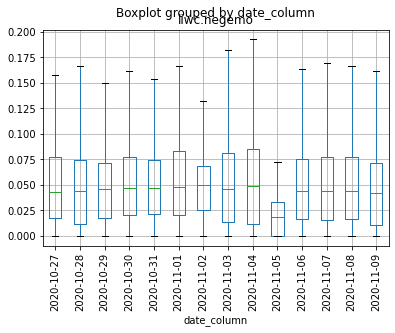

In [27]:
#occurrence of positive words
boxplot_positive = df_all_rd.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)
#occurrence of negative words
boxplot_negative = df_all_rd.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

We can see that appearance of negative emotion words increased a little bit after the election while the positive emotion goes up a little bit and then goes down.

## Twitter Data
### 1. Data Loading, Sanity Check (null id and values), and Overview


In [33]:
#check posting frequency (twitter)

tw_before_df = pd.read_csv (r'../data/twitter_before_election.csv')
tw_after_df = pd.read_csv (r'../data/twitter_after_election.csv')

tw_before_df = tw_before_df[tw_before_df['id'].notnull()]
tw_after_df  = tw_after_df[tw_after_df ['id'].notnull()]


display(tw_before_df[:5])
print("=============================================================")
print("= In total, we have {} Twitter text data before election =".format(len(tw_before_df.index)))
print("=============================================================")

display(tw_after_df[:5])
print("=============================================================")
print("= In total, we have {} Twitter text data after election =".format(len(tw_after_df.index)))
print("=============================================================")


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1321240093240295425,2020-10-27T23:59:20.000Z,@Julius_S_Malema @MbuyiseniNdlozi We have to r...,angoni_SA (Mark),0.026853,0.184329,0.010633,0.386941,0.029954,0.000000,...,0.0,0.062500,0,0.062500,0.062500,0.0,0.000000,0.062500,0.187500,disgust
1,1321237354242207745,2020-10-27T23:48:27.000Z,Iowa: vote. Vote like you have never voted bef...,erubio_p (Enrique Rubio),0.266907,0.007849,0.014483,0.027961,0.020272,0.043478,...,0.0,0.130435,0,0.000000,0.086957,0.0,0.043478,0.043478,0.086957,joy
2,1321236969687445509,2020-10-27T23:46:55.000Z,@turboj67 @AmericaFirst_DT @POTUS He will defi...,peanutweet (peanut),0.021672,0.010799,0.017449,0.175937,0.028793,0.000000,...,0.0,0.071429,0,0.071429,0.000000,0.0,0.071429,0.142857,0.142857,disgust
3,1321235612419194880,2020-10-27T23:41:32.000Z,Last chance to save America from Trump. Speak ...,rdthill (Rich Thill),0.065798,0.012577,0.017626,0.040828,0.029741,0.000000,...,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000,0.142857,0.142857,joy
4,1321231673644752896,2020-10-27T23:25:52.000Z,Trump has shown he has no interest in leading ...,rdthill (Rich Thill),0.057351,0.007617,0.011136,0.066971,0.010860,0.000000,...,0.0,0.083333,0,0.083333,0.166667,0.0,0.083333,0.250000,0.250000,disgust


= In total, we have 29468 Twitter text data before election =


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1323776566413922304,2020-11-03T23:58:22.000Z,@TheSun She's the worst 'role model' to campai...,Justice49561154 (Justice ☘️),0.006227,0.108996,0.011567,0.816266,0.005650,0.000000,...,0.000000,0.125000,0,0.000000,0.041667,0.041667,0.041667,0.041667,0.208333,disgust
1,1323776341418926087,2020-11-03T23:57:29.000Z,Ok. Done. Just got back from voting. My son j...,YouLookinStupid (Biden Won. Trump Lost. Get Ov...,0.074078,0.034704,0.006238,0.178436,0.015627,0.076923,...,0.038462,0.038462,0,0.076923,0.000000,0.038462,0.038462,0.192308,0.038462,disgust
2,1323773050983079936,2020-11-03T23:44:24.000Z,@JackPosobiec Please God let Trump have enough...,VanChocStraw20 (Jimmie Bartholemew),0.031066,0.034827,0.023405,0.222576,0.029253,0.058824,...,0.000000,0.000000,0,0.176471,0.058824,0.058824,0.000000,0.117647,0.117647,disgust
3,1323772959115325440,2020-11-03T23:44:02.000Z,I thought we quit giving a shit what the brits...,redpillfreak (Conservative Freak),0.006889,0.848685,0.004975,0.104250,0.009288,0.050000,...,0.000000,0.050000,0,0.050000,0.000000,0.000000,0.000000,0.050000,0.100000,anger
4,1323771930147725313,2020-11-03T23:39:57.000Z,@EricTrump Both #RadicalLeft and their #Islami...,Justice49561154 (Justice ☘️),0.006453,0.096954,0.009879,0.792978,0.012830,0.000000,...,0.000000,0.050000,0,0.000000,0.050000,0.050000,0.000000,0.100000,0.100000,disgust


= In total, we have 356500 Twitter text data after election =


### 2. Statistical analysis overview and boxplot for numerical value

In [34]:
print("Facebook data before election:")
tw_before_df.describe()

Facebook data before election:


,id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,2.946800e+04,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000,...,29468.000000,29468.000000,29468.000000,29468.0,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000,29468.000000
mean,1.322204e+18,0.027275,0.182555,0.015784,0.425428,0.047133,0.032560,0.089247,0.017386,0.059610,...,0.000925,0.002446,0.065050,0.0,0.041961,0.049200,0.029702,0.020825,0.139193,0.121315
std,7.744844e+14,0.088286,0.251147,0.045901,0.288322,0.136152,0.048722,0.073460,0.037412,0.061102,...,0.008056,0.013445,0.068409,0.0,0.055790,0.056658,0.045712,0.039443,0.081790,0.071794
min,1.320878e+18,0.003793,0.003449,0.003326,0.004535,0.003595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.021739,0.021739
25%,1.321527e+18,0.005440,0.018200,0.008937,0.129279,0.007423,0.000000,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.080000,0.066667
50%,1.322209e+18,0.008578,0.061151,0.011580,0.435776,0.012631,0.000000,0.076923,0.000000,0.050000,...,0.000000,0.000000,0.052632,0.0,0.000000,0.040000,0.000000,0.000000,0.125000,0.105263
75%,1.322944e+18,0.020379,0.227465,0.015052,0.717193,0.028897,0.055556,0.125000,0.000000,0.090909,...,0.000000,0.000000,0.100000,0.0,0.071429,0.083333,0.050000,0.038462,0.181818,0.157895
max,1.323415e+18,0.920635,0.897944,0.953656,0.854499,0.950302,0.500000,1.000000,0.500000,0.750000,...,0.250000,0.333333,0.750000,0.0,0.545455,0.437500,0.428571,1.000000,1.000000,1.000000


In [35]:
print("Facebook data after election:")
tw_after_df.describe()

Facebook data after election:


,id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,3.565000e+05,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000,...,356500.000000,356500.000000,356500.000000,356500.0,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000,356500.000000
mean,1.324891e+18,0.025240,0.217537,0.016308,0.427500,0.027036,0.038582,0.087865,0.014630,0.059106,...,0.000741,0.003255,0.066796,0.0,0.033393,0.042771,0.026426,0.015885,0.141078,0.120477
std,5.922188e+14,0.080348,0.277747,0.051885,0.281598,0.077146,0.051864,0.072638,0.033586,0.061580,...,0.007204,0.015353,0.070358,0.0,0.049346,0.053965,0.044054,0.034269,0.080007,0.072245
min,1.323415e+18,0.003719,0.003384,0.002926,0.004264,0.003298,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.019608,0.020408
25%,1.324450e+18,0.005342,0.022442,0.008467,0.140046,0.007158,0.000000,0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.066667
50%,1.324836e+18,0.007896,0.074543,0.011212,0.431182,0.011060,0.000000,0.076923,0.000000,0.050000,...,0.000000,0.000000,0.052632,0.0,0.000000,0.033333,0.000000,0.000000,0.125000,0.100000
75%,1.325386e+18,0.018938,0.316301,0.014677,0.711197,0.023174,0.066667,0.125000,0.000000,0.090909,...,0.000000,0.000000,0.105263,0.0,0.055556,0.074074,0.047619,0.000000,0.181818,0.153846
max,1.325951e+18,0.925096,0.898714,0.955077,0.854980,0.950930,1.000000,1.000000,1.000000,1.000000,...,0.285714,0.500000,1.000000,0.0,1.000000,0.600000,0.750000,1.000000,1.500000,1.000000


Text(0.5, 1.0, 'Twitter data after election (numerical features)')

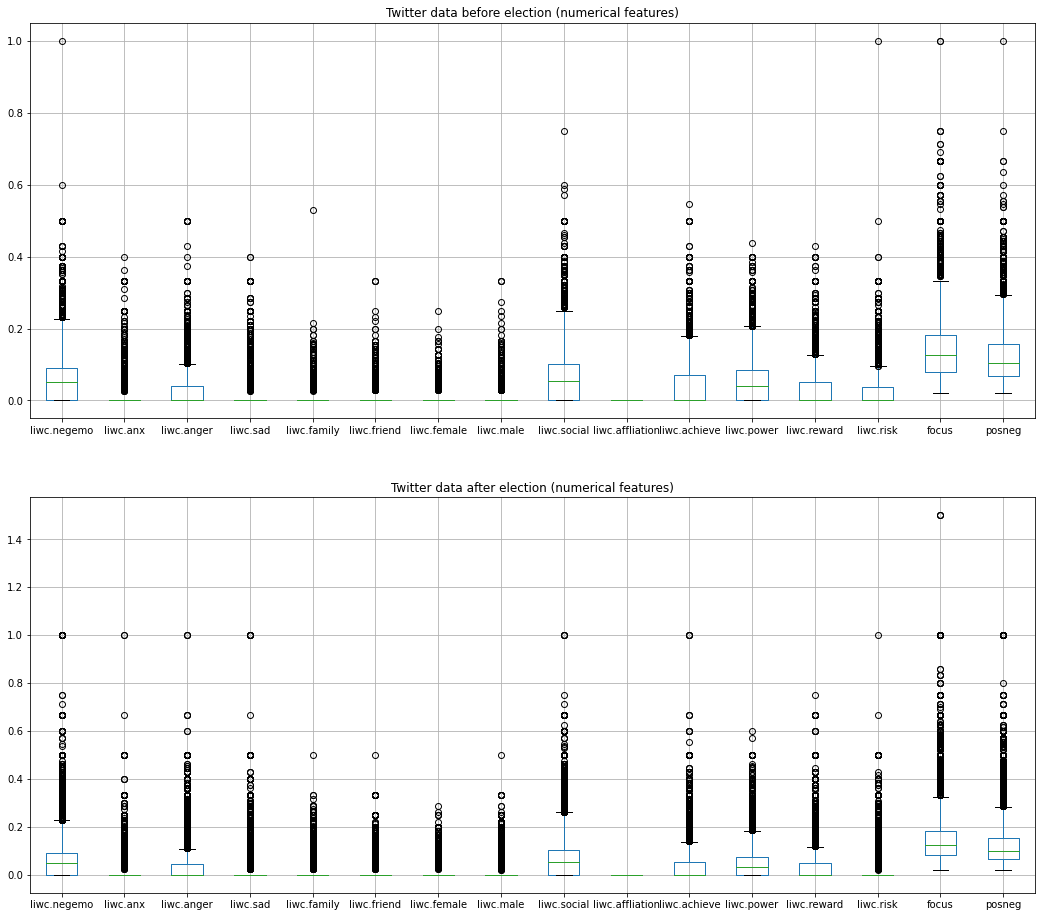

In [36]:
f, ax = plt.subplots(2, figsize=(18, 16))
plt.subplot(2,1,1)
boxplot = tw_before_df.boxplot(column=tw_before_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot.set_title("Twitter data before election (numerical features)")

plt.subplot(2,1,2)
boxplot2 = tw_after_df.boxplot(column=tw_after_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot2.set_title("Twitter data after election (numerical features)")

### 3. Frequency of post over time

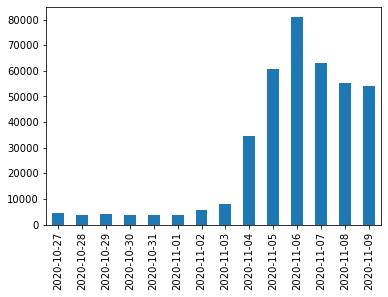

In [37]:
df_all_tw = [tw_before_df,tw_after_df ]
df_all_tw = pd.concat(df_all_tw)
df_all_tw['date_column'] = pd.to_datetime(df_all_tw['created_at']).dt.date
tw_freq = df_all_tw['date_column'].value_counts(sort = False)
date_plot = tw_freq.plot(kind='bar')

We can see that election related tweets skyrocketed after the election.

### 4. Emotion (category data) share

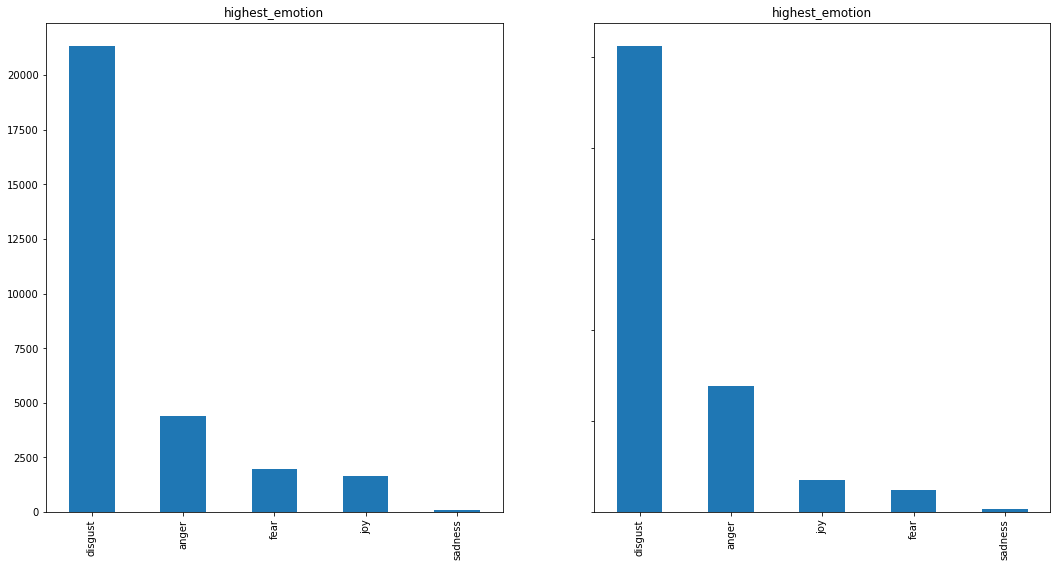

In [38]:
f, ax = plt.subplots(1,2, figsize=(18, 9))

plt.subplot(1,2,1)
before_emotion_count = tw_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot = before_emotion_count.plot(kind='bar', subplots = True, sharey = True)

plt.subplot(1,2,2)
after_emotion_count = tw_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot = after_emotion_count.plot(kind='bar', subplots = True, sharey = True)


Both before and after the election, disgust is the most common emotion shown in these posts. We can see also more post showing anger after the election in Twitter

### 5. Emotion values over time

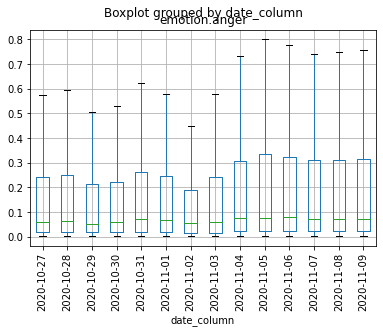

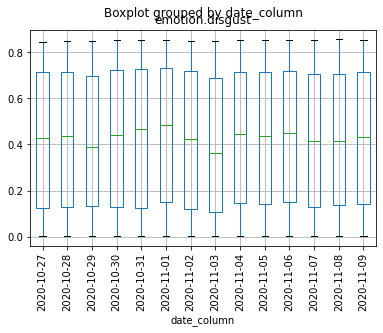

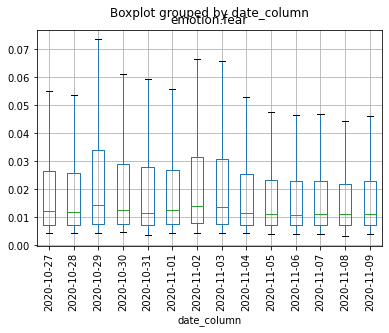

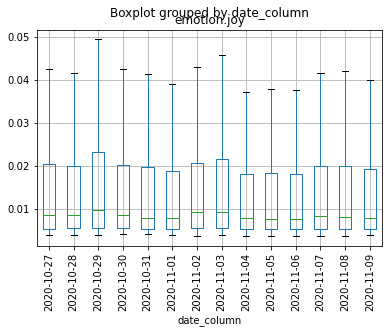

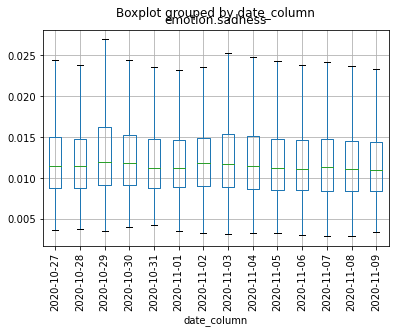

In [39]:
#check growth of each emotions per date (twitter)

boxplot_anger = df_all_tw.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_disgust = df_all_tw.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_fear = df_all_tw.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_joy = df_all_tw.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_sadness = df_all_tw.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

From the box plot we can see that emotion values fluctuate before and after the election. Disgust and Anger in posts show a slightly increase after the election, there's a decrease of both fear, and joy after the election, while the sadness showed no discernible patterns 

### 6. Most common tweeting accounts

In [40]:
#most common twitter accounts
df_all_tw['author_id'].value_counts().head()



Ray42827150 (Ray)                 856
AjanduChibuko (Ajandu Chibuko)    599
123_Smiling (CW)                  510
spunkkee (Patric D 🆘 🇺🇸 🇨🇦)       460
ProudOfMyUSA (ProudAmerican)      450
Name: author_id, dtype: int64

### 7. Occurrence of negative and positive sayings

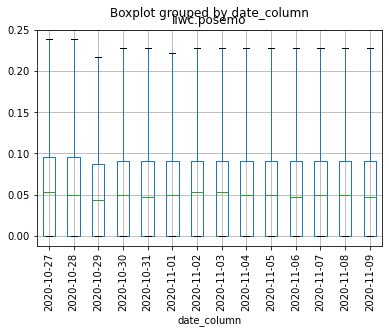

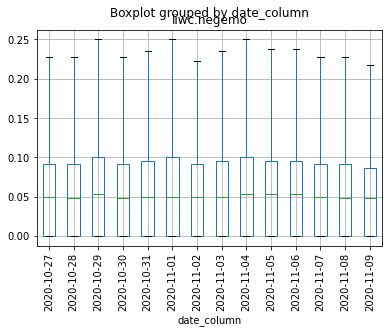

In [41]:
#occurrence of positive words
boxplot_positive = df_all_tw.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)
#occurrence of negative words
boxplot_negative = df_all_tw.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

We can see that appearance of negative emotion words increased a little bit and then turn down after the election while positive emotion words showed a slight decline.
